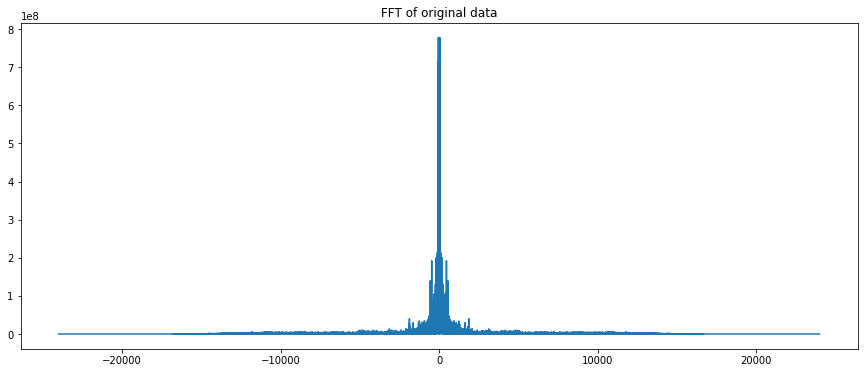

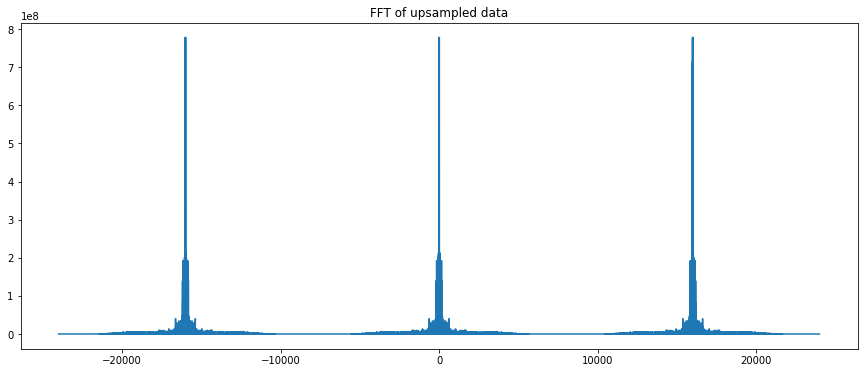

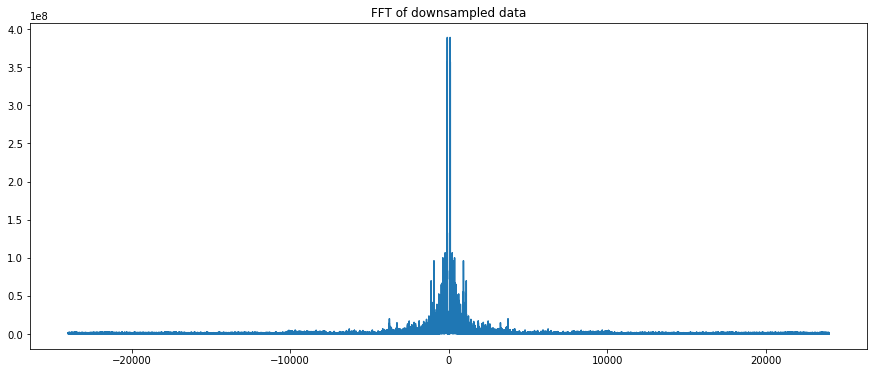

In [54]:
#Load the given test audio and upsample by 3x. Plot the FFT of the original signal and the zero-inserted signal.
from scipy import signal
from scipy.io.wavfile import read
from IPython.display import Audio
import matplotlib.pyplot as plt
import numpy as np

fs, data = read('test_audio.wav')
data = data[:,0]

L = len(data)
pi = np.pi
#interpolation
up_data = []
for i in range(0, 3*L, 3):
    up_data.append(data[int(i/3)])
    up_data.append(0)
    up_data.append(0)


d_fft = np.fft.fftshift(np.fft.fft(data))
w = 2*pi*(np.fft.fftfreq(L))
w = np.fft.fftshift(w)
x_axis1 = fs*w/(2*pi)
#x_axis1 = np.linspace(-fs/2, fs/2, len(d_fft))
up_d_fft = np.fft.fftshift(np.fft.fft(up_data))
x_axis2 = np.linspace(-fs/2, fs/2, len(up_d_fft))

plt.figure(figsize = (15,6))
plt.title("FFT of original data")
plt.plot(x_axis1, np.absolute(d_fft))

plt.figure(figsize = (15,6))
plt.title("FFT of upsampled data")
plt.plot(x_axis2, np.absolute(up_d_fft))
plt.show()


#down sample by factor of 2
down_data = []
for i in range(0, L, 2):
    down_data.append(data[i])

down_d_fft = np.fft.fftshift(np.fft.fft(down_data))
x_axis3 = np.linspace(-fs/2, fs/2, len(down_d_fft))

plt.figure(figsize = (15,6))
plt.title("FFT of downsampled data")
plt.plot(x_axis3, np.absolute(down_d_fft))
plt.show()


In [48]:
from scipy import signal
from scipy.io.wavfile import read, write
from IPython.display import Audio

Fs, data = read('test_audio.wav')
data = data[:, 0]


up_ratio = [2,1,1]
down_ratio = [1,1,2]

#Try a few resampling ratios, including at least MN={2,1,1/2}.
output=[]

#for i in range(3):

output.append(signal.resample_poly(data, up_ratio[2], down_ratio[2]))
#    s = "output" + str(i)
#    print(s)
#ratio = up_ratio[0]/down_ratio[0]
output = np.asarray(output).astype('int16')
#write("out_new", data = output, rate = Fs)
Audio(output , rate=Fs)


What is the relationship between the original signal's FFT and the upsampled signal's FFT?
How do we preserve the original information without introducing aliasing?
What is the relationship between the original signal's FFT and the downsampled signal's FFT?
How do we preserve the original information without introducing aliasing?

1.  Upsampled fft spectrum is shrunk by upsampling ratio, and is repeated for two times within
    the range of +- fs/2.
    We can preserve the original info by implementing a LPF, and get rid of the repeated part.

2.  Downsampled fft spectrum is stretched by downsampling ratio, and the Magnitude is compressed
    to half of the original Mag.
    To avoid aliasing, the useful way is to make sure the downsampling rate do not reach the
    Nyqist rate so that the downsampled result would not be too bad.

What does the resulting audio sound like? Be specific in your response. 
How do the vocal characteristics of the singer change?
1. original: sounds pretty normal
2. upsampled: sounds super high, and the voice of the singer is just like chipmunk
3. downsampled: background music sounds nice, but the voice of the singer is like a
    big big man singing with an extra BASS frequency.
